In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
d=pd.read_csv('cars_dataset.csv')
d

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
72430,I30,2016,8680,Manual,25906,Diesel,0.0,78.4,1.6,Hyundai
72431,I40,2015,7830,Manual,59508,Diesel,30.0,65.7,1.7,Hyundai
72432,I10,2017,6830,Manual,13810,Petrol,20.0,60.1,1.0,Hyundai
72433,Tucson,2018,13994,Manual,23313,Petrol,145.0,44.8,1.6,Hyundai


In [4]:
d.transmission.unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [9]:
d.fuelType.unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Other', 'Electric'], dtype=object)

In [10]:
d.Make.unique()

array(['audi', 'BMW', 'Ford', 'vw', 'toyota', 'skoda', 'Hyundai'],
      dtype=object)

In [30]:
d.head(2)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi


In [14]:
d.transmission=d.transmission.replace('Other','Manual')
d.fuelType=d.fuelType.replace('Other','Electric')

In [15]:
d.fuelType.unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Electric'], dtype=object)

In [16]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72435 entries, 0 to 72434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         72435 non-null  object 
 1   year          72435 non-null  int64  
 2   price         72435 non-null  int64  
 3   transmission  72435 non-null  object 
 4   mileage       72435 non-null  int64  
 5   fuelType      72435 non-null  object 
 6   tax           72435 non-null  float64
 7   mpg           72435 non-null  float64
 8   engineSize    72435 non-null  float64
 9   Make          72435 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [24]:
upperlimit=d['mpg'].mean()+3*d['mpg'].std()
lowerlimit=d.mpg.mean()*3-d.mpg.std()
print('UpperLimit:',upperlimit)
print('LowerLimit:',lowerlimit)

UpperLimit: 107.19565303320223
LowerLimit: 150.44304950433715


In [22]:
d.loc[d['mpg']> upperlimit]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
3106,A3,2015,14981,Semi-Auto,28294,Hybrid,0.0,188.3,1.4,audi
4261,A3,2015,17990,Automatic,14000,Hybrid,0.0,188.3,1.4,audi
4493,A3,2014,15490,Automatic,24597,Hybrid,0.0,188.3,1.4,audi
4879,A3,2014,15000,Semi-Auto,24597,Hybrid,0.0,188.3,1.4,audi
10392,A3,2015,14000,Automatic,63000,Hybrid,0.0,188.3,1.4,audi
...,...,...,...,...,...,...,...,...,...,...
66368,Superb,2020,29799,Automatic,897,Hybrid,135.0,201.8,1.4,skoda
67419,Superb,2020,26795,Automatic,3600,Hybrid,135.0,201.8,1.4,skoda
68788,Ioniq,2018,18970,Automatic,14886,Hybrid,135.0,256.8,1.6,Hyundai
69663,Ioniq,2019,19995,Automatic,7386,Hybrid,135.0,256.8,1.6,Hyundai


In [25]:
d.loc[d['mpg']< lowerlimit]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
72430,I30,2016,8680,Manual,25906,Diesel,0.0,78.4,1.6,Hyundai
72431,I40,2015,7830,Manual,59508,Diesel,30.0,65.7,1.7,Hyundai
72432,I10,2017,6830,Manual,13810,Petrol,20.0,60.1,1.0,Hyundai
72433,Tucson,2018,13994,Manual,23313,Petrol,145.0,44.8,1.6,Hyundai


In [26]:
upperlimit=d['mileage'].mean()+3*d['mileage'].std()
lowerlimit=d.mileage.mean()*3-d.mileage.std()
print('UpperLimit:',upperlimit)
print('LowerLimit:',lowerlimit)

UpperLimit: 87171.06374254155
LowerLimit: 48198.03560805782


In [27]:
d.loc[d['mileage']> upperlimit]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
54,Q5,2015,14700,Automatic,89483,Diesel,205.0,47.1,2.0,audi
66,A4,2016,10200,Manual,97440,Diesel,20.0,70.6,2.0,audi
73,A3,2016,8300,Manual,88215,Diesel,20.0,68.9,2.0,audi
151,A3,2013,8300,Manual,98940,Diesel,0.0,74.3,1.6,audi
157,A6,2016,16200,Automatic,89334,Diesel,30.0,62.8,3.0,audi
...,...,...,...,...,...,...,...,...,...,...
72293,I30,2009,2495,Manual,125968,Petrol,160.0,46.3,1.4,Hyundai
72300,I20,2013,2995,Manual,97500,Petrol,30.0,57.6,1.2,Hyundai
72301,I20,2016,5490,Manual,88000,Diesel,20.0,68.9,1.4,Hyundai
72325,Santa Fe,2015,11500,Automatic,91700,Diesel,265.0,41.5,2.2,Hyundai


In [28]:
d.model.isnull().sum()

0

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for c in d_cat:
    d[c]=le.fit_transform(d[c])

In [52]:
d_cat=list(d.select_dtypes(object).columns)

In [53]:
d

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,8,2017,12500,1,15735,3,150.0,55.4,1.4,3
1,13,2016,16500,0,36203,0,20.0,64.2,2.0,3
2,8,2016,11000,1,29946,3,30.0,55.4,1.4,3
3,11,2017,16800,0,25952,0,145.0,67.3,2.0,3
4,10,2019,17300,1,1998,3,145.0,49.6,1.0,3
...,...,...,...,...,...,...,...,...,...,...
72430,56,2016,8680,1,25906,0,0.0,78.4,1.6,2
72431,57,2015,7830,1,59508,0,30.0,65.7,1.7,2
72432,54,2017,6830,1,13810,3,20.0,60.1,1.0,2
72433,126,2018,13994,1,23313,3,145.0,44.8,1.6,2


<Axes: >

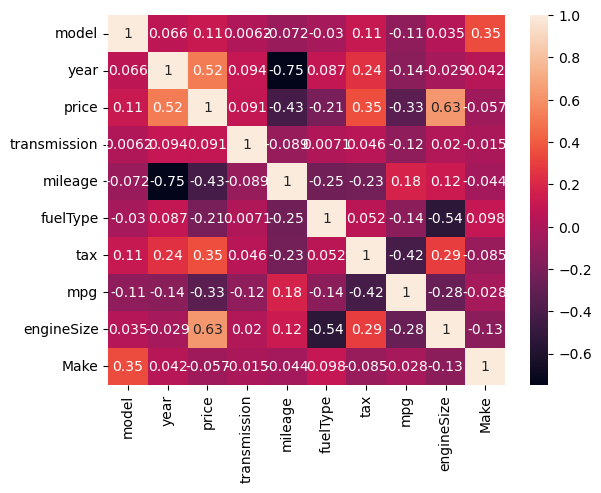

In [37]:
sns.heatmap(d.corr(),annot=True)

In [68]:
for col in d_cat:
    dumm = pd.get_dummies(d[col], prefix = str(col)+'_', dtype=int)
    d = pd.concat([d,dumm], axis=1)

In [69]:
d.drop(d_cat,axis=1,inplace=True)

In [70]:
d

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,8,2017,12500,1,15735,3,150.0,55.4,1.4,3
1,13,2016,16500,0,36203,0,20.0,64.2,2.0,3
2,8,2016,11000,1,29946,3,30.0,55.4,1.4,3
3,11,2017,16800,0,25952,0,145.0,67.3,2.0,3
4,10,2019,17300,1,1998,3,145.0,49.6,1.0,3
...,...,...,...,...,...,...,...,...,...,...
72430,56,2016,8680,1,25906,0,0.0,78.4,1.6,2
72431,57,2015,7830,1,59508,0,30.0,65.7,1.7,2
72432,54,2017,6830,1,13810,3,20.0,60.1,1.0,2
72433,126,2018,13994,1,23313,3,145.0,44.8,1.6,2


In [72]:
x=d.drop(['price'],axis=1)
y=d['price']

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [74]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression() # object
LR.fit(x_train, y_train) #traing LR
y_predict=LR.predict(x_test)

In [75]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
r2score=r2_score(y_test,y_predict)
r2score

0.7160102411943534